In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

# SDD data set

In [4]:
dataset_path = "/home/q392358/Documents/FLORA/data/SDD/"

## Read the dataset and build a unique dataframe

In [12]:
# Read all scene annotations and store them in a unique dataframe 
# Each row will have this format: [scene_name, frameID, agentID, x, y, lost, occluded, interpolated, agent_type]
scenes_annotations_dataframe = pd.DataFrame(columns=["scene_name", "video_name", "frameID", "agentID", "x", "y", "lost", "occluded", "interpolated", "agent_type"],
                                            dtype=np.float64)

# Since the label is stored as a float number, we need this array to take their correspondent categorical value
agents_type = ["Biker", "Pedestrian", "Skater", "Cart", "Car", "Bus"]

for root, dirs, files in os.walk(dataset_path):
    if root != dataset_path:
        break;
    for scene_folder in dirs:
        if scene_folder == 'sdd':
            continue
        scene_dataframe = pd.read_csv(root + scene_folder + "/" + scene_folder + "_originalSDD.txt", sep=' ', header=None, 
                                 names=["frameID", "agentID", "x", "y", "lost", "occluded", "interpolated", "agent_type"])
        scene_dataframe["scene_name"] = scene_folder.split("_")[0]
        scene_dataframe["video_name"] = scene_folder
        scenes_annotations_dataframe = scenes_annotations_dataframe.append(scene_dataframe)

In [13]:
scenes_annotations_dataframe.head()

,agentID,agent_type,frameID,interpolated,lost,occluded,scene_name,video_name,x,y
0,0.0,1,0.0,0,0.0,0.0,quad,quad_0,488.5,221.5
1,0.0,1,1.0,1,0.0,0.0,quad,quad_0,488.5,221.5
2,0.0,1,2.0,1,0.0,0.0,quad,quad_0,488.5,221.5
3,0.0,1,3.0,1,0.0,0.0,quad,quad_0,491.0,221.5
4,0.0,1,4.0,1,0.0,0.0,quad,quad_0,491.0,221.5


## Overall statistics

In [14]:
videos = scenes_annotations_dataframe["video_name"].unique()
scenes = scenes_annotations_dataframe["scene_name"].unique()

print("Number of scenes: ", len(scenes))
print("Number of videos: ", len(videos))
print("Number of annotated frames: ", scenes_annotations_dataframe["frameID"].nunique())
print("Number of annotated agents: ", scenes_annotations_dataframe["agentID"].nunique())

Number of scenes:  8
Number of videos:  48
Number of annotated frames:  14558
Number of annotated agents:  1352


## Per-scene statistics

/home/q392358/.local/share/virtualenvs/safe_gan/lib/python3.6/site-packages/matplotlib/axes/_base.py:3455: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


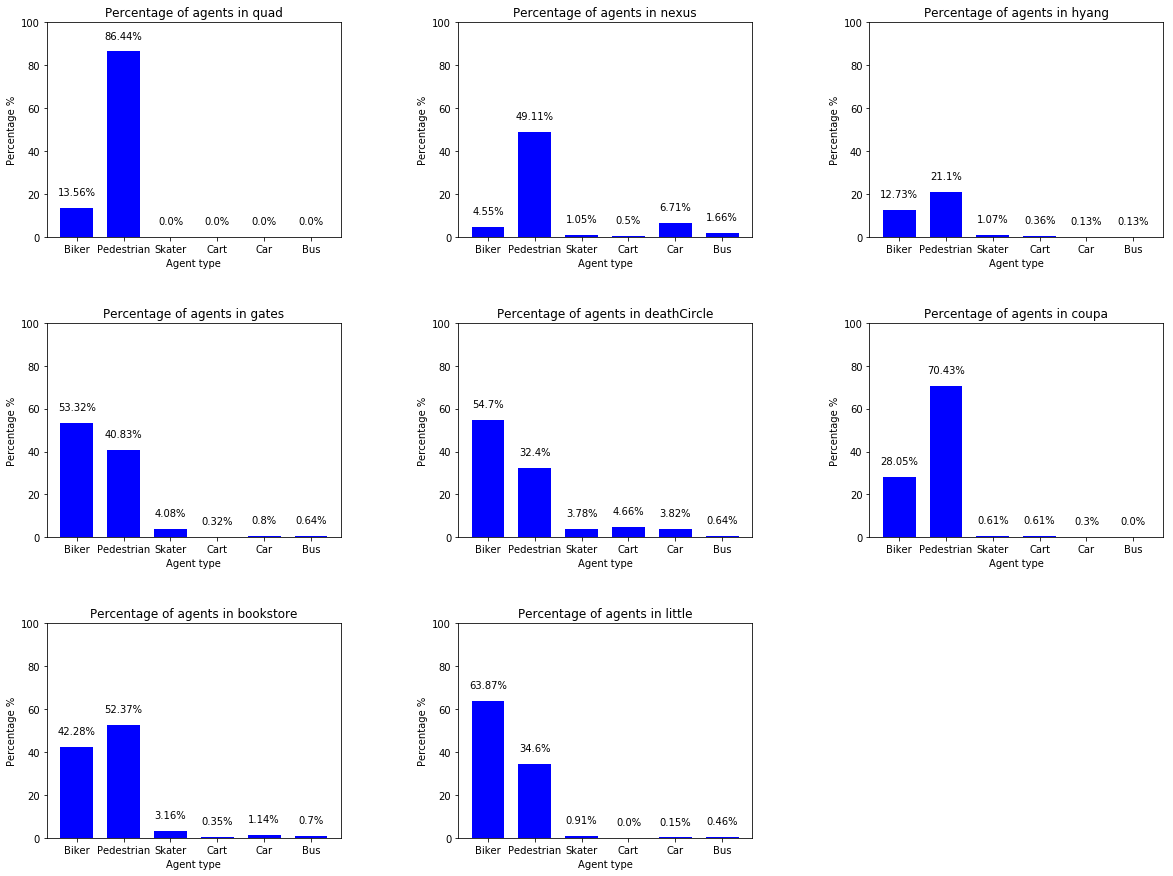

In [15]:
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, scene in enumerate(scenes):
    percentage_values = []
    
    for agent_idx, agent in enumerate(agents_type):
        scene_agents_count = scenes_annotations_dataframe[(scenes_annotations_dataframe["scene_name"] == scene) & 
                                                           (scenes_annotations_dataframe["agent_type"] == float(agent_idx))].groupby(["agentID", "video_name"]).ngroups
        scene_count = scenes_annotations_dataframe[scenes_annotations_dataframe['scene_name'] == scene].groupby(["agentID", "video_name"]).ngroups
        
        agent_percentage = (scene_agents_count / scene_count)*100.0
        percentage_values.append(agent_percentage)
    
    ax = fig.add_subplot(3, 3, i+1)
    bar1 = ax.bar(range(len(percentage_values)), percentage_values, 0.70, color="b", tick_label=agents_type)
    ax.set_ylabel("Percentage %")
    ax.set_xlabel('Agent type')
    ax.set_title('Percentage of agents in ' + scene)
    # Set a clean upper y-axis limit.
    ax.set_ylim(ymax=100)
    
    rects = ax.patches
    for rect, label in zip(rects, percentage_values):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, str(round(label,2)) + "%", ha='center', va='bottom')

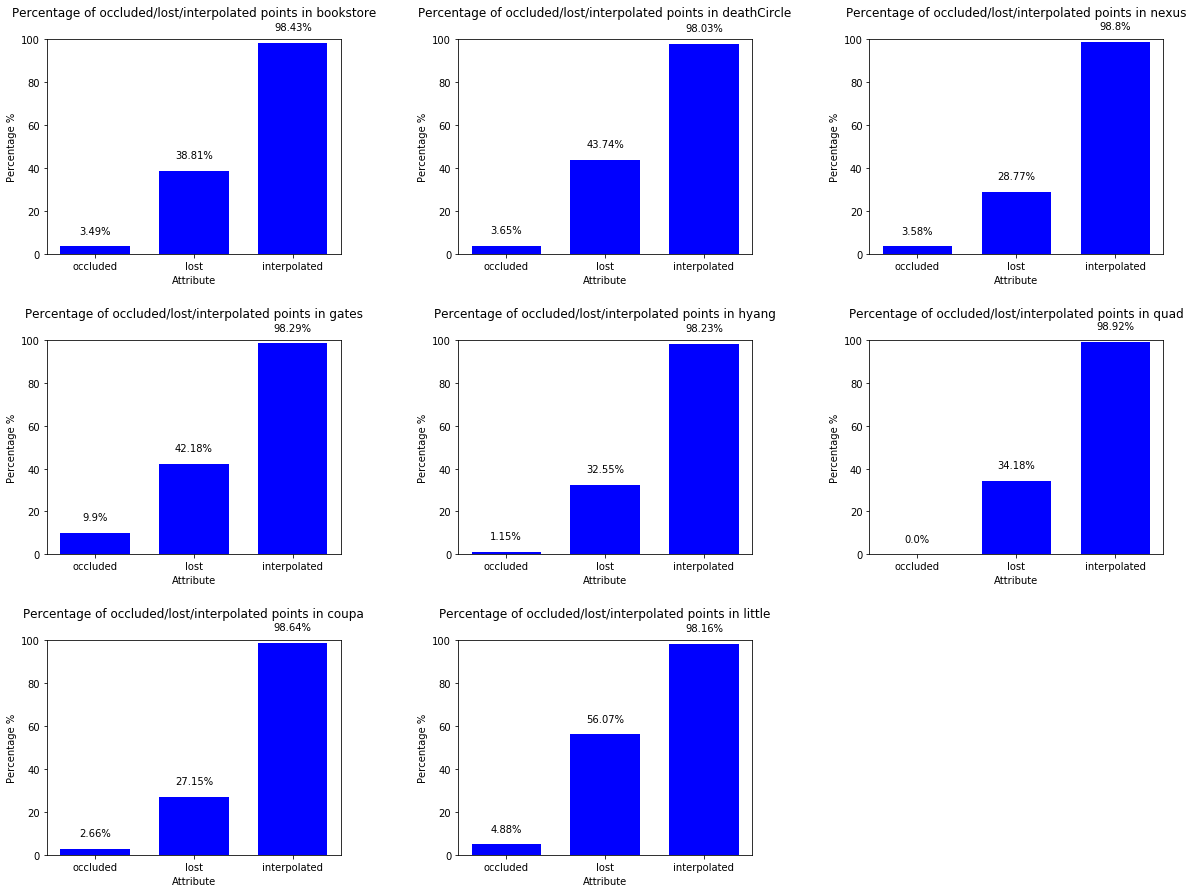

In [36]:
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, scene in enumerate(scenes):
    percentage_values = []
    
    for attribute_idx, attribute in enumerate(["occluded", "lost", "interpolated"]):
        scene_attribute_count = scenes_annotations_dataframe[(scenes_annotations_dataframe["scene_name"] == scene) & 
                                                           (scenes_annotations_dataframe[attribute] == 1.0)].shape[0]
        scene_count = scenes_annotations_dataframe[scenes_annotations_dataframe['scene_name'] == scene].shape[0]
        
        attribute_percentage = (scene_attribute_count / scene_count)*100.0
        percentage_values.append(attribute_percentage)
    
    ax = fig.add_subplot(3, 3, i+1)
    bar1 = ax.bar(range(len(percentage_values)), percentage_values, 0.70, color="b", tick_label=["occluded", "lost", "interpolated"])
    ax.set_ylabel("Percentage %")
    ax.set_xlabel('Attribute')
    ax.set_title('Percentage of occluded/lost/interpolated points in ' + scene, y=1.08)
    # Set a clean upper y-axis limit.
    ax.set_ylim(ymax=100)
    
    rects = ax.patches
    for rect, label in zip(rects, percentage_values):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, str(round(label,2)) + "%", ha='center', va='bottom')

# UCY data set

In [1]:
dataset_path = "/home/q392358/Documents/FLORA/data/UCY/"

In [4]:
# Read all scene annotations and store them in a unique dataframe 
# Each row will have this format: [scene_name, frameID, agentID, x, y, lost, occluded, interpolated, agent_type]
scenes_annotations_dataframe = pd.DataFrame(columns=["scene_name", "video_name", "frameID", "agentID", "x", "y"],
                                            dtype=np.float64)


for root, dirs, files in os.walk(dataset_path):
    if root != dataset_path:
        break;
    for scene_folder in dirs:
        if scene_folder == 'ucy':
            continue
        scene_dataframe = pd.read_csv(root + scene_folder + "/" + scene_folder + ".txt", sep=' ', header=None, 
                                 names=["frameID", "agentID", "x", "y"])
        scene_dataframe["scene_name"] = scene_folder.split("_")[0]
        scene_dataframe["video_name"] = scene_folder
        scenes_annotations_dataframe = scenes_annotations_dataframe.append(scene_dataframe)

/home/q392358/.local/share/virtualenvs/safe_gan/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
scenes_annotations_dataframe.head()

,agentID,frameID,scene_name,video_name,x,y
0,1.0,0.0,zara,zara_1,13.449,3.938
1,2.0,0.0,zara,zara_1,13.343,4.439
2,3.0,0.0,zara,zara_1,11.912,4.439
3,4.0,0.0,zara,zara_1,11.828,5.155
4,5.0,0.0,zara,zara_1,8.713,4.415


In [209]:
videos = scenes_annotations_dataframe["video_name"].unique()
scenes = scenes_annotations_dataframe["scene_name"].unique()

print("Number of scenes: ", len(scenes))
print("Number of videos: ", len(videos))

frame_length = np.diff(scenes_annotations_dataframe[scenes_annotations_dataframe.video_name == video].frameID.unique())[0]
tot_frames = [(max(scenes_annotations_dataframe[scenes_annotations_dataframe.video_name == video].frameID) - min(scenes_annotations_dataframe[scenes_annotations_dataframe.video_name == video].frameID)) / frame_length for video in videos]
tot_agents = [len(scenes_annotations_dataframe[scenes_annotations_dataframe.video_name == video].agentID.unique()) for video in videos]

print("Number of annotated frames: ", tot_frames)
print("Number of annotated agents: ", tot_agents)

Number of scenes:  2
Number of videos:  3
Number of annotated frames:  [540.0, 901.0, 1051.0]
Number of annotated agents:  [434, 148, 204]


In [49]:
scenes_annotations_dataframe = scenes_annotations_dataframe.sort_values(['video_name', 'scene_name', 'frameID', 'agentID'])
scenes_annotations_dataframe.head()

,agentID,frameID,scene_name,video_name,x,y
0,1.0,0.0,students,students_3,9.050,6.038
1,2.0,0.0,students,students_3,11.344,7.398
2,3.0,0.0,students,students_3,6.082,3.604
3,4.0,0.0,students,students_3,2.273,6.205
4,5.0,0.0,students,students_3,13.680,6.539


## Select scene

In [52]:
def get_positions(frame):
    return np.transpose(np.stack([frame.x, frame.y]))

def get_position(frame, ped):
    frame_ped = frame[frame.agentID == ped]
    return np.transpose(np.stack([frame_ped.x, frame_ped.y]))

## Collision frequency

In [194]:
def in_collision(current_frame, minimum_distance=0.3):
    other_pos = get_positions(current_frame)
    collisions = []
    for i, p1 in enumerate(other_pos):
        for j, p2 in enumerate(other_pos[i+1:]):
            if np.linalg.norm(p1-p2) <= minimum_distance:
                pedestrian_tuple = (current_frame.agentID.iloc[i], current_frame.agentID.iloc[i+j+1])
                collisions.append(pedestrian_tuple)
    return collisions

collision = {}
for video in videos:
    scene_annotations_dataframe = scenes_annotations_dataframe[scenes_annotations_dataframe.video_name == video]
    frames = scene_annotations_dataframe.frameID.unique()
    for frame in frames:
        current_frame = scene_annotations_dataframe[scene_annotations_dataframe.frameID == frame]
        if len(in_collision(current_frame)) > 0:
            collision[(video, frame)] = in_collision(current_frame) # one or more pedestrians colliding

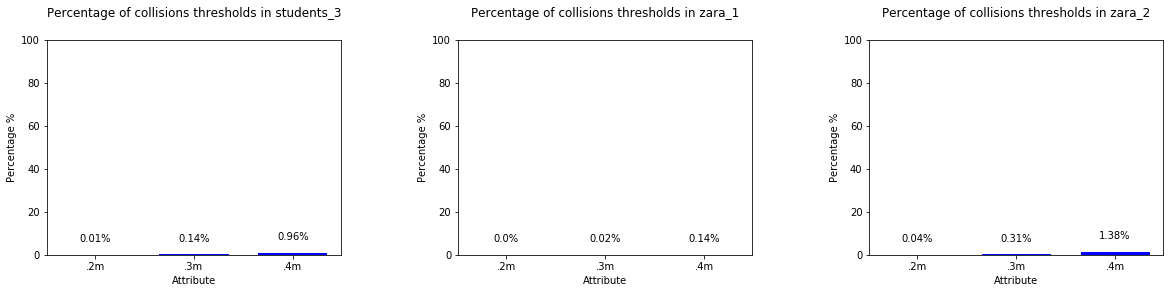

In [252]:
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

thresholds = [0.2, 0.3, 0.4]

collision = {}
for i, video in enumerate(videos):
    percentage_values = []
    
    for attribute_idx, attribute in enumerate(thresholds):
        collision = {}

        scene_annotations_dataframe = scenes_annotations_dataframe[scenes_annotations_dataframe.video_name == video]
        frames = scene_annotations_dataframe.frameID.unique()
        for frame in frames:
            current_frame = scene_annotations_dataframe[scene_annotations_dataframe.frameID == frame]
            if len(in_collision(current_frame, attribute)) > 0:
                collision[(video, frame)] = in_collision(current_frame, attribute) # one or more pedestrians colliding
        
        scene_attribute_count = len(collision)
        scene_count = scenes_annotations_dataframe[scenes_annotations_dataframe['video_name'] == video].shape[0]
        
        attribute_percentage = (scene_attribute_count / scene_count)*100.0
        percentage_values.append(attribute_percentage)
    
    ax = fig.add_subplot(3, 3, i+1)
    bar1 = ax.bar(range(len(percentage_values)), percentage_values, 0.70, color="b", tick_label=[".2m", ".3m", ".4m"])
    ax.set_ylabel("Percentage %")
    ax.set_xlabel('Attribute')
    ax.set_title('Percentage of collisions thresholds in ' + video, y=1.08)
    # Set a clean upper y-axis limit.
    ax.set_ylim(ymax=100)
    
    rects = ax.patches
    for rect, label in zip(rects, percentage_values):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, str(round(label,2)) + "%", ha='center', va='bottom')

### Fixed threshold show corresponding frames

In [216]:
collision = {}
for video in videos:
    scene_annotations_dataframe = scenes_annotations_dataframe[scenes_annotations_dataframe.video_name == video]
    frames = scene_annotations_dataframe.frameID.unique()
    for frame in frames:
        current_frame = scene_annotations_dataframe[scene_annotations_dataframe.frameID == frame]
        if len(in_collision(current_frame)) > 0:
            collision[(video, frame)] = in_collision(current_frame) # one or more pedestrians colliding

In [217]:
def get_pixels_from_world(pts_wrd, h, divide_depth=True):
    ones_vec = np.ones(pts_wrd.shape[0])

    pts_wrd_3d = np.stack((pts_wrd[:, 0], pts_wrd[:, 1], ones_vec))

    pts_img_back_3d = np.around(np.dot(np.linalg.inv(h), pts_wrd_3d)[0:3, :].T, decimals=2)
    pts_img_back = np.stack((np.divide(pts_img_back_3d[:, 0], pts_img_back_3d[:, 2]),
                                 np.divide(pts_img_back_3d[:, 1], pts_img_back_3d[:, 2]))).T

    return pts_img_back

In [244]:
from IPython import display
import time
import imageio
import pylab
import matplotlib.patches as patches
import datetime 

frame_rate = 25

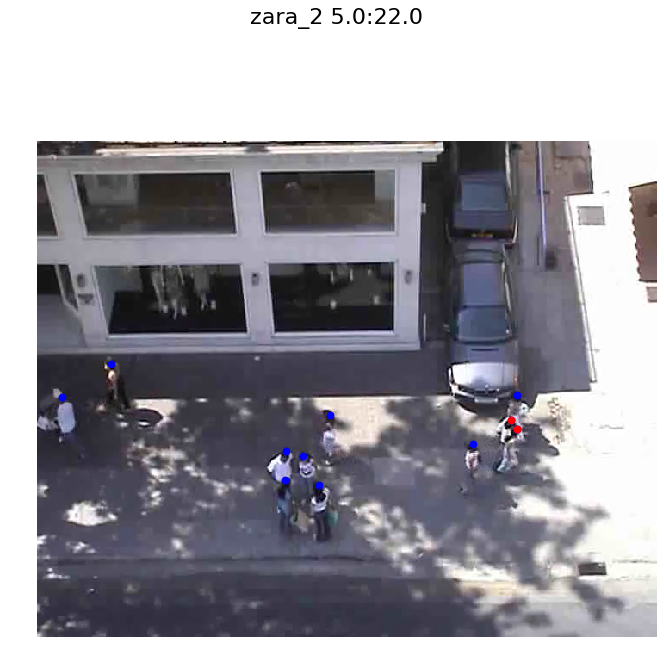

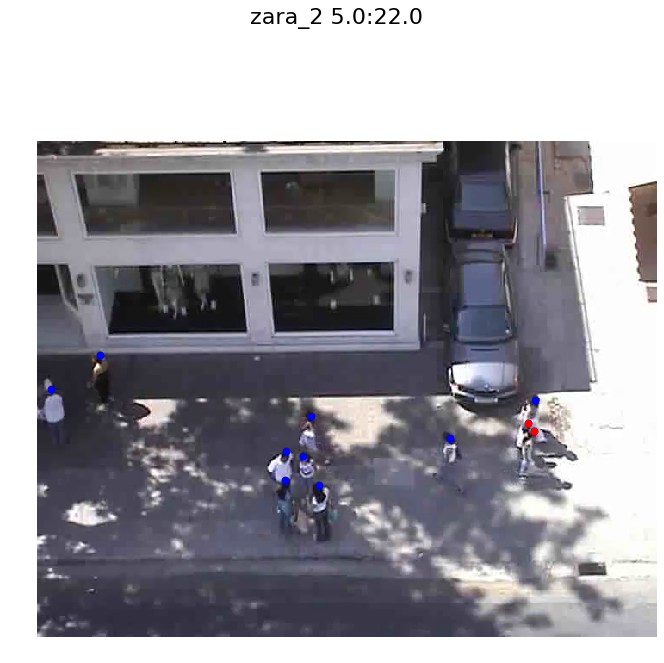

In [245]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
for key, peds in collision.items():
    (video, frame) = key
    scene_annotations_dataframe = scenes_annotations_dataframe[scenes_annotations_dataframe.video_name == video]
    frames = scene_annotations_dataframe.frameID.unique()
    video_num = video[-1]
    scene_name = video[:-2]
    
    path = '/home/q392358/Documents/FLORA/data/UCY/{}_{}'.format(scene_name, video_num)
    h_matrix = pd.read_csv(path + '/{}_homography.txt'.format(video), delim_whitespace=True, header=None).values

    filename = '/media/q392358/ba2b8f54-91f6-4e35-8323-e164edb98d11/stanford_campus_dataset/videos/{}/video{}/video.mov'.format(scene_name, video_num)
    vid = imageio.get_reader(filename,  'ffmpeg')
    #frame_rate = len(vid)/len(frames)        

    current_frame = scene_annotations_dataframe[scene_annotations_dataframe.frameID == frame]
    xy = np.transpose(np.stack([current_frame.x, current_frame.y]))
    pixels = get_pixels_from_world(xy, h_matrix)
    image = vid.get_data(int(frame))
    fig = pylab.figure(1)
    m, s = divmod(frame//frame_rate, 60)
    fig.suptitle('{} {}:{}'.format(video, m, s), fontsize=20)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    ax.clear()
    ax.imshow(image)
    ax.scatter(pixels[:, 0], pixels[:, 1], color='blue')
    for couple in peds:
        pixs = get_pixels_from_world(np.vstack([get_position(current_frame, couple[0]), get_position(current_frame, couple[1])]), h_matrix)
        ax.scatter(pixs[:, 0], pixs[:, 1], color='red')
    ax.axis('off')
    time.sleep(0.1)
    
pylab.show()
